In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_data = pd.read_csv('/content/movies.csv', header = 0)
df_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
df_rating = pd.read_csv('/content/ratings.csv', header = 0)
df_rating

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [5]:
df_merged = df_rating.merge(df_data, on='movieId')
df_merged

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
1048570,7120,168,5.0,1175543061,First Knight (1995),Action|Drama|Romance
1048571,7120,253,4.0,1175542225,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
1048572,7120,260,5.0,1175542035,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1048573,7120,261,4.0,1175543376,Little Women (1994),Drama


In [6]:
df_merged.drop('timestamp', axis=1, inplace=True)
df_merged

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
1048570,7120,168,5.0,First Knight (1995),Action|Drama|Romance
1048571,7120,253,4.0,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
1048572,7120,260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1048573,7120,261,4.0,Little Women (1994),Drama


In [7]:
df_merged.shape

(1048575, 5)

In [8]:
df_merged.dtypes

,0
userId,int64
movieId,int64
rating,float64
title,object
genres,object


In [9]:
df_merged.isnull().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,0


In [10]:
movie_count = df_merged['movieId'].nunique()
movie_count

14026

In [11]:
customer_count = df_merged['userId'].nunique()
customer_count

7120

In [12]:
ratings = df_merged['rating'].unique()
ratings

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

In [13]:
stars = df_merged['rating'].value_counts()
stars

,count
rating,
4.0,295135
3.0,226202
5.0,152562
3.5,112926
4.5,79848
2.0,74706
2.5,44791
1.0,35144
1.5,14029


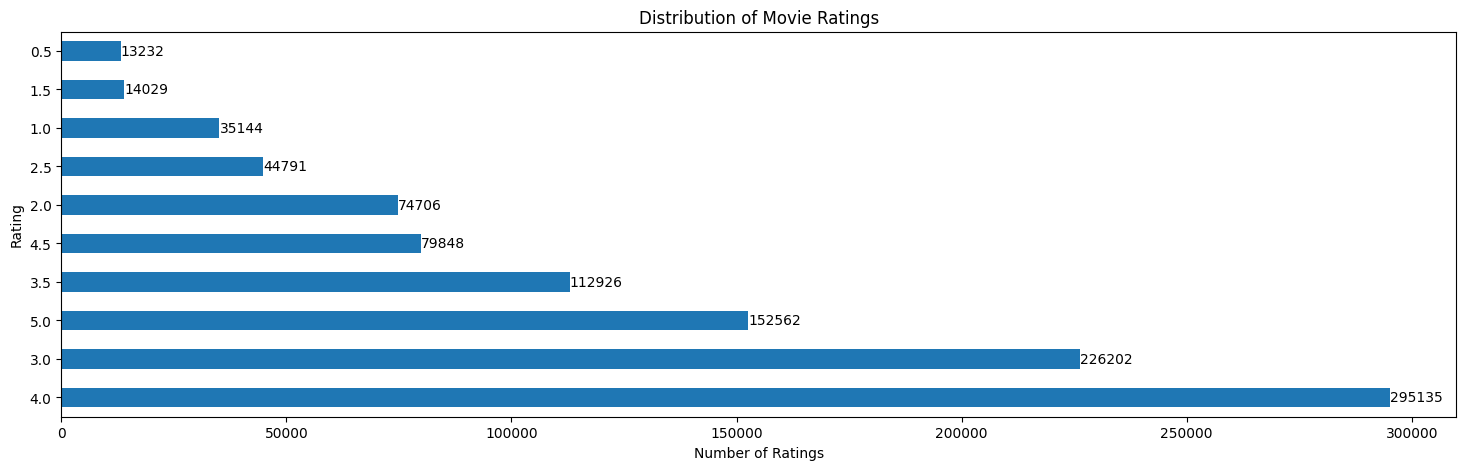

In [14]:
ax = stars.plot(kind='barh', figsize=(18, 5))

# Add labels and title
ax.set_xlabel("Number of Ratings")
ax.set_ylabel("Rating")
ax.set_title("Distribution of Movie Ratings")

# Add labels to each bar
for i, v in enumerate(stars):
  ax.text(v + 1, i, str(v), va='center')

plt.show()

In [15]:
df_merged

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
1048570,7120,168,5.0,First Knight (1995),Action|Drama|Romance
1048571,7120,253,4.0,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
1048572,7120,260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1048573,7120,261,4.0,Little Women (1994),Drama


In [16]:
dataset_movie_summary= df_merged.groupby('movieId')['rating'].agg(["count"])
dataset_movie_summary

,count
movieId,
1,2569
2,1155
3,685
4,138
5,657
...,...
130073,1
130219,1
130462,1


In [17]:
dataset_movie_summary["count"].quantile(0.7)

30.0

In [19]:
dataset_movie_summary = df_merged.groupby('movieId')['rating'].agg(["count", "mean"])

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 30.0


In [ ]:
drop_movie_list

In [20]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = df_merged.groupby('userId')['rating'].agg(['count', 'mean']) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 131.0


In [21]:
drop_cust_list

Index([   2,    4,    5,    6,    8,    9,   10,   12,   13,   15,
       ...
       7108, 7109, 7111, 7112, 7113, 7114, 7115, 7118, 7119, 7120],
      dtype='int64', name='userId', length=4982)

In [22]:
dataset = df_merged[~df_merged['movieId'].isin(drop_movie_list)]
dataset = df_merged[~df_merged['userId'].isin(drop_cust_list)]

print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (777324, 5)


In [23]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [24]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=42083b989142c030e606e24e2edddf474b60934ebeb83d6b79977263d8080e32
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [25]:
# Import required libraries
import math
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [26]:
df_p = pd.pivot_table(dataset,values='rating',index='userId',columns='movieId')

print(df_p.shape)

(2138, 13760)


In [27]:
df_p

movieId,1,2,3,4,5,6,7,8,9,10,...,129303,129350,129354,129428,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,4.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7107,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7110,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
reader = Reader()
data = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']][:100000], reader)
model = SVD()
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9282  0.9300  0.9377  0.9320  0.0041  
MAE (testset)     0.7177  0.7180  0.7226  0.7194  0.0022  
Fit time          1.51    1.47    1.85    1.61    0.17    
Test time         0.29    0.62    0.83    0.58    0.22    


{'test_rmse': array([0.92818747, 0.92995127, 0.93771511]),
 'test_mae': array([0.71774737, 0.71797284, 0.72258201]),
 'fit_time': (1.5114867687225342, 1.4703788757324219, 1.8507592678070068),
 'test_time': (0.29123997688293457, 0.6234965324401855, 0.8260142803192139)}

In [29]:
df_movies = pd.read_csv('/content/movies.csv', header = 0)
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [30]:
from surprise import SVD, Reader, Dataset


def get_top_n_recommendations(user_id, n):

    user_df = df_movies.copy()

    user_df = user_df.reset_index()

    user_df = user_df[~user_df['movieId'].isin(drop_movie_list)]

    user_df['Estimate_Score'] = user_df['movieId'].apply(lambda x: model.predict(user_id, x).est)

    user_df = user_df.drop('movieId', axis=1)
    user_df = user_df.sort_values('Estimate_Score', ascending=False)


    return user_df.head(n)



In [31]:
#The user and the number of recommendation you want
user_id = 712664
n = 10
top_n_recommendations = get_top_n_recommendations(user_id, n)
print(top_n_recommendations)


      index                                         title  \
315     315              Shawshank Redemption, The (1994)   
1195   1195                Godfather: Part II, The (1974)   
843     843                         Godfather, The (1972)   
293     293                           Pulp Fiction (1994)   
2772   2772                        American Beauty (1999)   
1181   1181                  To Kill a Mockingbird (1962)   
886     886                                Vertigo (1958)   
7249   7249  Eternal Sunshine of the Spotless Mind (2004)   
49       49                    Usual Suspects, The (1995)   
2873   2873                             Fight Club (1999)   

                              genres  Estimate_Score  
315                      Crime|Drama        4.515369  
1195                     Crime|Drama        4.372811  
843                      Crime|Drama        4.367728  
293      Comedy|Crime|Drama|Thriller        4.349970  
2772                    Comedy|Drama        4.316932 

In [32]:
# Convert genres into multi-hot encoded columns
genre_dummies = df_merged['genres'].str.get_dummies(sep='|')
#df = pd.concat([df_merged, genre_dummies], axis=1)
genre_dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1048571,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1048572,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1048573,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
genre_dummies = genre_dummies.drop(genre_dummies.columns[0], axis=1)
genre_dummies

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1048571,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1048572,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1048573,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# OBJECTIVE 1: Find out the list of most popular and liked genre
genre_popularity = genre_dummies.sum().sort_values(ascending=False)

genre_popularity.head(10)

,0
Drama,461704
Comedy,395994
Action,293934
Thriller,278937
Adventure,230358
Romance,201209
Crime,171866
Sci-Fi,166024
Fantasy,110815
Children,87101


In [48]:
#Create Model that finds the best suited Movie for one
# user in every genre

def get_best_movie_per_genre(user_id, df_merged, model, df_movies):

    best_movies_per_genre = {}
    genres = set()
    for movie_genres in df_merged['genres'].unique():
        for genre in movie_genres.split('|'):
            genres.add(genre)

    for genre in genres:
        # Filter movies by genre
        genre_movies = df_merged[df_merged['genres'].str.contains(genre)]

        if not genre_movies.empty:
            # Get recommendations for the user within this genre
            genre_movie_ids = genre_movies['movieId'].unique()
            predictions = []
            for movie_id in genre_movie_ids:
                prediction = model.predict(user_id, movie_id)
                predictions.append((movie_id, prediction.est))

            # Sort predictions by estimated rating
            predictions.sort(key=lambda x: x[1], reverse=True)

            if predictions:
                best_movie_id = predictions[0][0]
                best_movie_title = df_movies[df_movies['movieId'] == best_movie_id]['title'].iloc[0]
                best_movies_per_genre[genre] = best_movie_title

    return best_movies_per_genre



user_id = 712664
best_movies = get_best_movie_per_genre(user_id, df_merged, model, df_movies)
print(f'BEST RECOMMENDATION ACCORDING TO USER FOR EVERY GENRE: {best_movies}')

<ipython-input-48-287ef4b19696>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_movies = df_merged[df_merged['genres'].str.contains(genre)]


BEST RECOMMENDATION ACCORDING TO USER FOR EVERY GENRE: {'Horror': 'Silence of the Lambs, The (1991)', 'Thriller': 'Pulp Fiction (1994)', 'Animation': 'Spirited Away (Sen to Chihiro no kamikakushi) (2001)', 'Mystery': 'Vertigo (1958)', 'Children': 'Wallace & Gromit: The Wrong Trousers (1993)', 'IMAX': 'Dark Knight, The (2008)', 'Comedy': 'Pulp Fiction (1994)', 'Musical': "Dr. Horrible's Sing-Along Blog (2008)", '(no genres listed)': 'Sputnik (2013)', 'Romance': 'Vertigo (1958)', 'Documentary': 'Crumb (1994)', 'Drama': 'Shawshank Redemption, The (1994)', 'Crime': 'Shawshank Redemption, The (1994)', 'Adventure': 'City of God (Cidade de Deus) (2002)', 'Action': 'Fight Club (1999)', 'Western': 'Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)', 'Film-Noir': 'Maltese Falcon, The (1941)', 'War': "Schindler's List (1993)", 'Sci-Fi': 'Eternal Sunshine of the Spotless Mind (2004)', 'Fantasy': 'Spirited Away (Sen to Chihiro no kamikakushi) (2001)'}


In [50]:
#OBJECTIVE 3: Find what Genre Movies have received the best and
#

# Group by genre and calculate the average rating for each genre
genre_ratings = df_merged.groupby('genres')['rating'].mean()

# Find the genre with the highest average rating (best rating)
best_rated_genre = genre_ratings.idxmax()
best_rating = genre_ratings.max()

# Find the genre with the lowest average rating (worst rating)
worst_rated_genre = genre_ratings.idxmin()
worst_rating = genre_ratings.min()

print(f"Genre with the best average rating: {best_rated_genre} ({best_rating:.2f})")
print(f"Genre with the worst average rating: {worst_rated_genre} ({worst_rating:.2f})")

Genre with the best average rating: Adventure|Comedy|Crime|Drama|Fantasy|Mystery|Sci-Fi|Thriller (5.00)
Genre with the worst average rating: Action|Adventure|Horror|Sci-Fi|Thriller (0.50)
